<center style><h3>Computer Assignment 4</h3></center>
<center style><h4>Machine Learning</h4></center>
 <h4 style="text-align:right">
        محمد پویا افشاری - 810198577
</h4>


Project-point: in this project we are going to predict house prices based on Linear regression and use scikit learn to model based on Logistic Regression, K-Nearest-Neighbor, Decision Tree. Then we will apply the random forest and check results.


In [1]:
import pandas as pd
import math
import seaborn as sns
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
DATASET_PATH = 'house_data.csv'


## Checking the Dataset


In [3]:
dataset = pd.read_csv(DATASET_PATH)
display(dataset)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,style,house_age
0,0,0,0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650,...,1955.0,0,98178,47.5112,-122.257,1340,5650,Suburban,Contemporary,67
1,1,1,1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242,...,NaN,1991,98125,47.7210,-122.319,1690,7639,Suburban,Ranch,71
2,2,2,2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000,...,1933.0,0,98028,47.7379,-122.233,2720,8062,Rural,Victorian,89
3,3,3,3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000,...,1965.0,0,98136,47.5208,-122.393,1360,5000,Urban,Colonial,57
4,4,4,4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080,...,1987.0,0,98074,47.6168,-122.045,1800,7503,Suburban,Cape Cod,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,21608,21608,263000018,20140521T000000,360000.0,3,2.50,1530.0,1131,...,2009.0,0,98103,47.6993,-122.346,1530,1509,Suburban,Victorian,13
21609,21609,21609,21609,6600060120,20150223T000000,400000.0,4,2.50,2310.0,5813,...,2014.0,0,98146,47.5107,-122.362,1830,7200,Suburban,Cape Cod,8
21610,21610,21610,21610,1523300141,20140623T000000,402101.0,2,0.75,1020.0,1350,...,NaN,0,98144,47.5944,-122.299,1020,2007,Suburban,Ranch,13
21611,21611,21611,21611,291310100,20150116T000000,400000.0,3,2.50,1600.0,2388,...,2004.0,0,98027,47.5345,-122.069,1410,1287,Rural,Contemporary,18


### 1- Info and Describe methods


In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      21613 non-null  int64  
 1   Unnamed: 0.1    21613 non-null  int64  
 2   Unnamed: 0.1.1  21613 non-null  int64  
 3   id              21613 non-null  int64  
 4   date            21613 non-null  object 
 5   price           21613 non-null  float64
 6   bedrooms        21613 non-null  int64  
 7   bathrooms       21613 non-null  float64
 8   sqft_living     18528 non-null  float64
 9   sqft_lot        21613 non-null  int64  
 10  floors          18530 non-null  float64
 11  waterfront      21613 non-null  int64  
 12  view            21613 non-null  int64  
 13  condition       21613 non-null  int64  
 14  grade           21613 non-null  int64  
 15  sqft_above      21613 non-null  int64  
 16  sqft_basement   21184 non-null  float64
 17  yr_built        18531 non-null 

As the info() method shows, the dataset has 27 columns and 21613 rows.


In [5]:
dataset.describe()


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21613.00000,21613.00000,21613.00000,2.161300e+04,2.161300e+04,21613.000000,21613.000000,18528.000000,2.161300e+04,18530.000000,...,21613.000000,21184.000000,18531.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,10806.00000,10806.00000,4.580302e+09,5.401822e+05,3.367464,2.111900,2077.569031,1.510697e+04,1.492903,...,1788.390691,292.121082,1970.896714,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,50.994864
std,6239.28002,6239.28002,6239.28002,2.876566e+09,3.673622e+05,0.943028,0.780697,953.971679,4.142051e+04,0.538562,...,828.090978,442.637777,29.406420,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.373411
min,0.00000,0.00000,0.00000,1.000102e+06,7.500000e+04,-5.000000,-5.000000,-33323.000000,5.200000e+02,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.000000
25%,5403.00000,5403.00000,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,25.000000
50%,10806.00000,10806.00000,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.618000e+03,1.500000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,47.000000
75%,16209.00000,16209.00000,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,...,2210.000000,560.000000,1996.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,71.000000
max,21612.00000,21612.00000,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,122.000000


The `describe()` method shows the following statistics for each feature:

- count: Number of non-missing values
- mean: Mean of the values
- std: Standard deviation of the values
- min: Minimum value
- 25%: First quartile
- 50%: Second quartile (median)
- 75%: Third quartile
- max: Maximum value


### 2- Number of missing values and their percentage for each feature


In [6]:
# Calculate the number of missing values and their percentage for each feature
rowCount = dataset.shape[0]
for col in dataset.columns:
    nan = dataset[col].isna().sum()
    print(
        f'Number of NaN values in {col:30}-> {nan:3} ({nan / rowCount * 100:5.2f}%)')


Number of NaN values in Unnamed: 0                    ->   0 ( 0.00%)
Number of NaN values in Unnamed: 0.1                  ->   0 ( 0.00%)
Number of NaN values in Unnamed: 0.1.1                ->   0 ( 0.00%)
Number of NaN values in id                            ->   0 ( 0.00%)
Number of NaN values in date                          ->   0 ( 0.00%)
Number of NaN values in price                         ->   0 ( 0.00%)
Number of NaN values in bedrooms                      ->   0 ( 0.00%)
Number of NaN values in bathrooms                     ->   0 ( 0.00%)
Number of NaN values in sqft_living                   -> 3085 (14.27%)
Number of NaN values in sqft_lot                      ->   0 ( 0.00%)
Number of NaN values in floors                        -> 3083 (14.26%)
Number of NaN values in waterfront                    ->   0 ( 0.00%)
Number of NaN values in view                          ->   0 ( 0.00%)
Number of NaN values in condition                     ->   0 ( 0.00%)
Number of NaN valu

### 3- Plotting the relationship between the features and the target


First we should delete the columns which we dont want.


In [7]:

# dataset = dataset.drop(["house_age", "condition", "location", "style"])
dataset = dataset.drop("house_age", axis=1)
dataset = dataset.drop("condition", axis=1)
dataset = dataset.drop("location", axis=1)
dataset = dataset.drop("style", axis=1)
dataset = dataset.drop("Unnamed: 0", axis=1)
dataset = dataset.drop("Unnamed: 0.1", axis=1)
dataset = dataset.drop("Unnamed: 0.1.1", axis=1)
dataset = dataset.drop("date", axis=1)
dataset = dataset.drop("waterfront", axis=1)
dataset = dataset.drop("view", axis=1)
dataset = dataset.drop("yr_renovated", axis=1)
dataset = dataset.drop("lat", axis=1)
dataset = dataset.drop("long", axis=1)

print(dataset.columns.tolist())


['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15']


Second we should delete the rows which have negative values in the features as they are not valid.


In [8]:
negatives = dataset[dataset < 0].dropna(how='all')
display(negatives)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
66,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-234.0,NaN,NaN,NaN,NaN,NaN,NaN
1568,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880,NaN,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2436,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2989,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4740,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5477,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5674,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6062,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dataset = dataset.drop(negatives.index)
dataset.reset_index(drop=True, inplace=True)
dataset.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,2.158700e+04,2.158700e+04,21587.000000,21587.000000,18505.000000,2.158700e+04,18508.000000,21587.000000,21587.000000,21159.000000,18510.00000,21587.000000,21587.000000,21587.000000
mean,4.580906e+09,5.402098e+05,3.370918,2.114953,2079.685598,1.511445e+04,1.492895,7.656738,1788.479548,292.168014,1970.89195,98077.932413,1986.733636,12774.545606
std,2.876524e+09,3.674406e+05,0.930083,0.770129,918.021274,4.144269e+04,0.538531,1.175360,828.223138,442.682656,29.40898,53.495917,685.417913,27319.098841
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,1900.00000,98001.000000,399.000000,651.000000
25%,2.123049e+09,3.219750e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,1951.00000,98033.000000,1490.000000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,7.000000,1560.000000,0.000000,1975.00000,98065.000000,1840.000000,7620.000000
75%,7.309000e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069650e+04,2.000000,8.000000,2210.000000,560.000000,1996.00000,98118.000000,2360.000000,10085.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,13.000000,9410.000000,4820.000000,2015.00000,98199.000000,6210.000000,871200.000000


Now we can plot the relationship between the features and the target.


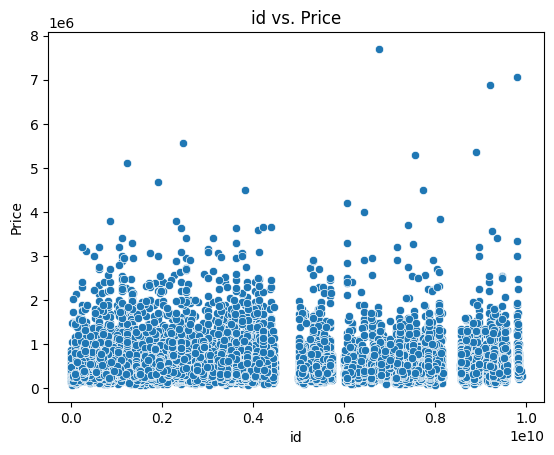

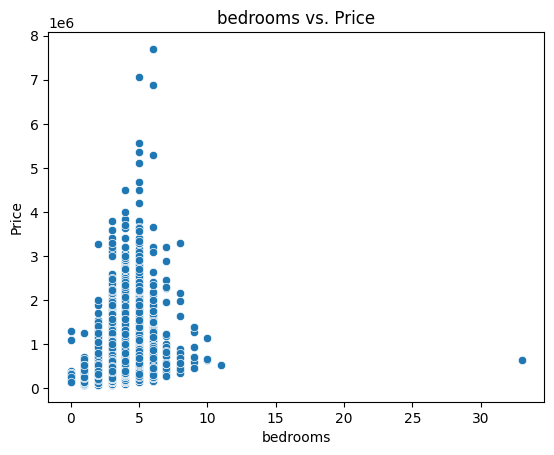

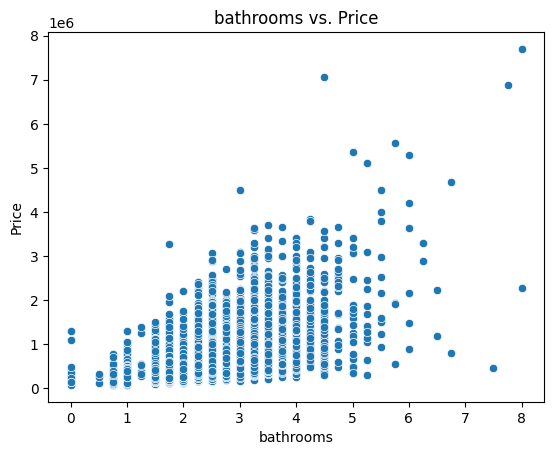

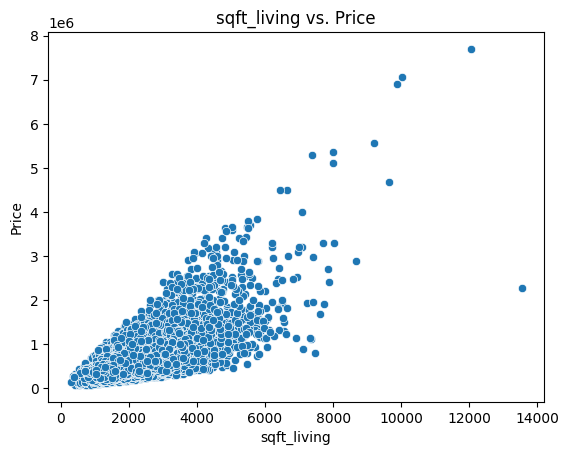

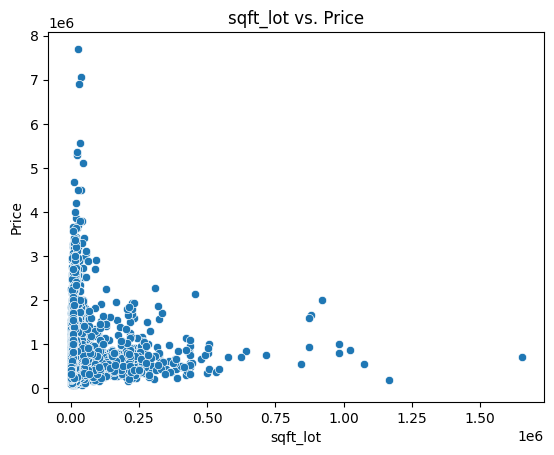

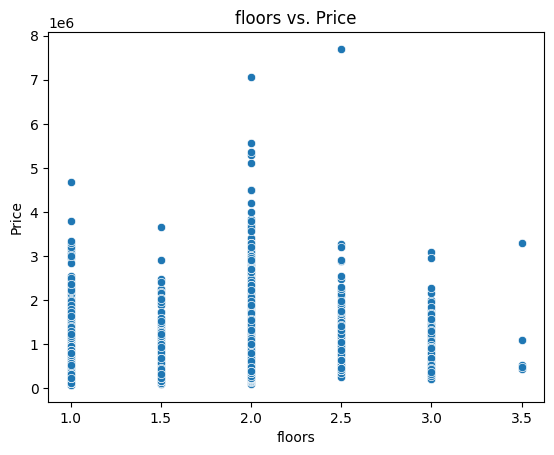

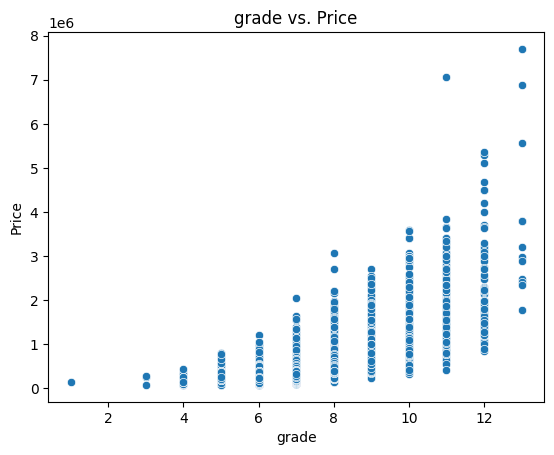

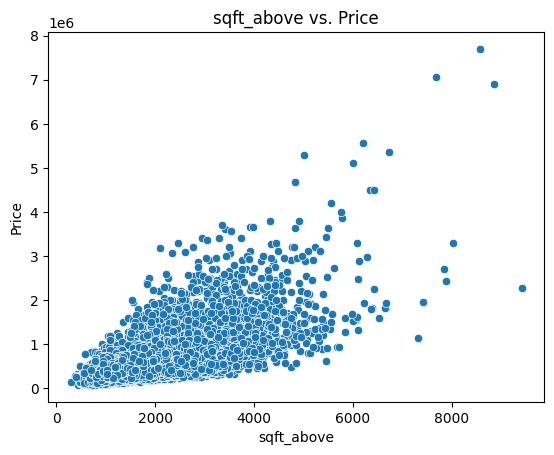

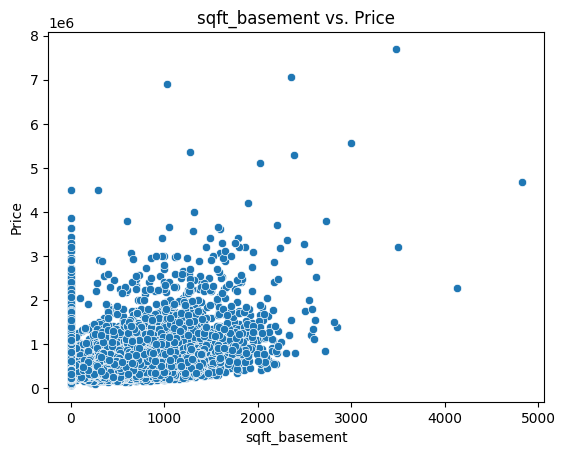

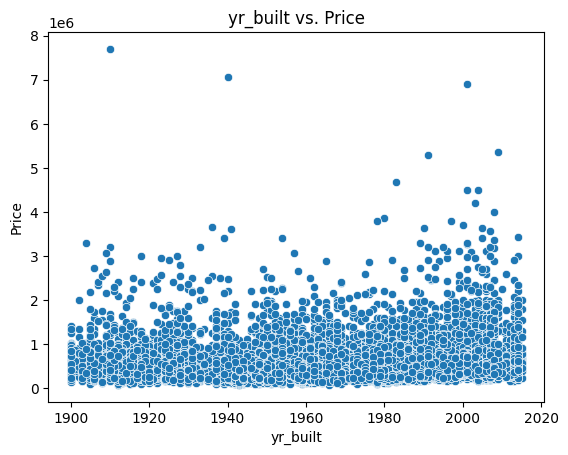

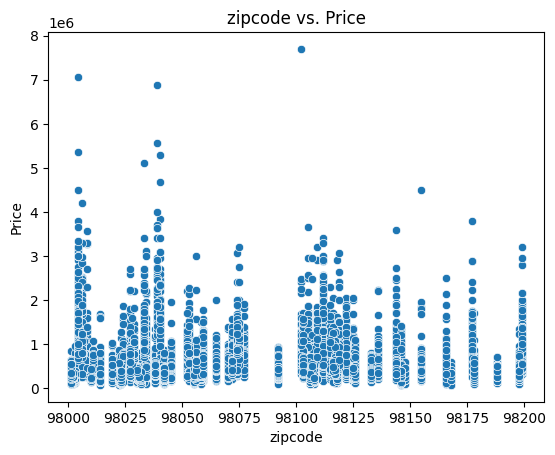

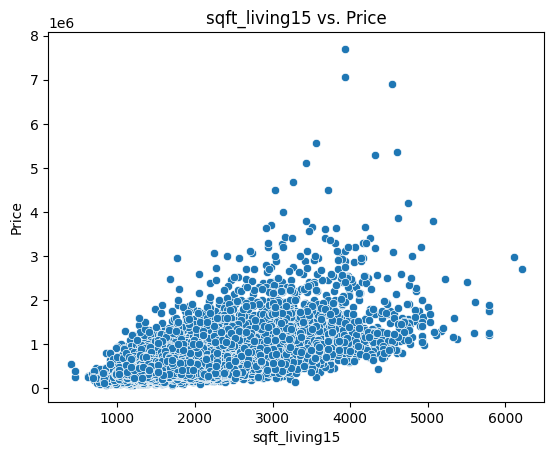

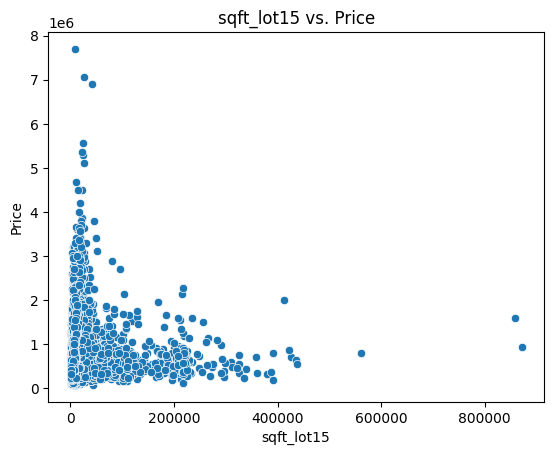

In [10]:
import matplotlib.pyplot as plt
dataset = dataset[dataset['price'] >= 0]
for col in dataset.columns:
    # exclude object-type columns and the target variable
    if dataset[col].dtype != 'object' and col != 'price':
        sns.scatterplot(x=col, y='price', data=dataset)
        plt.xlabel(col)
        plt.ylabel('Price')
        plt.title(f'{col} vs. Price')
        plt.show()


<AxesSubplot:>

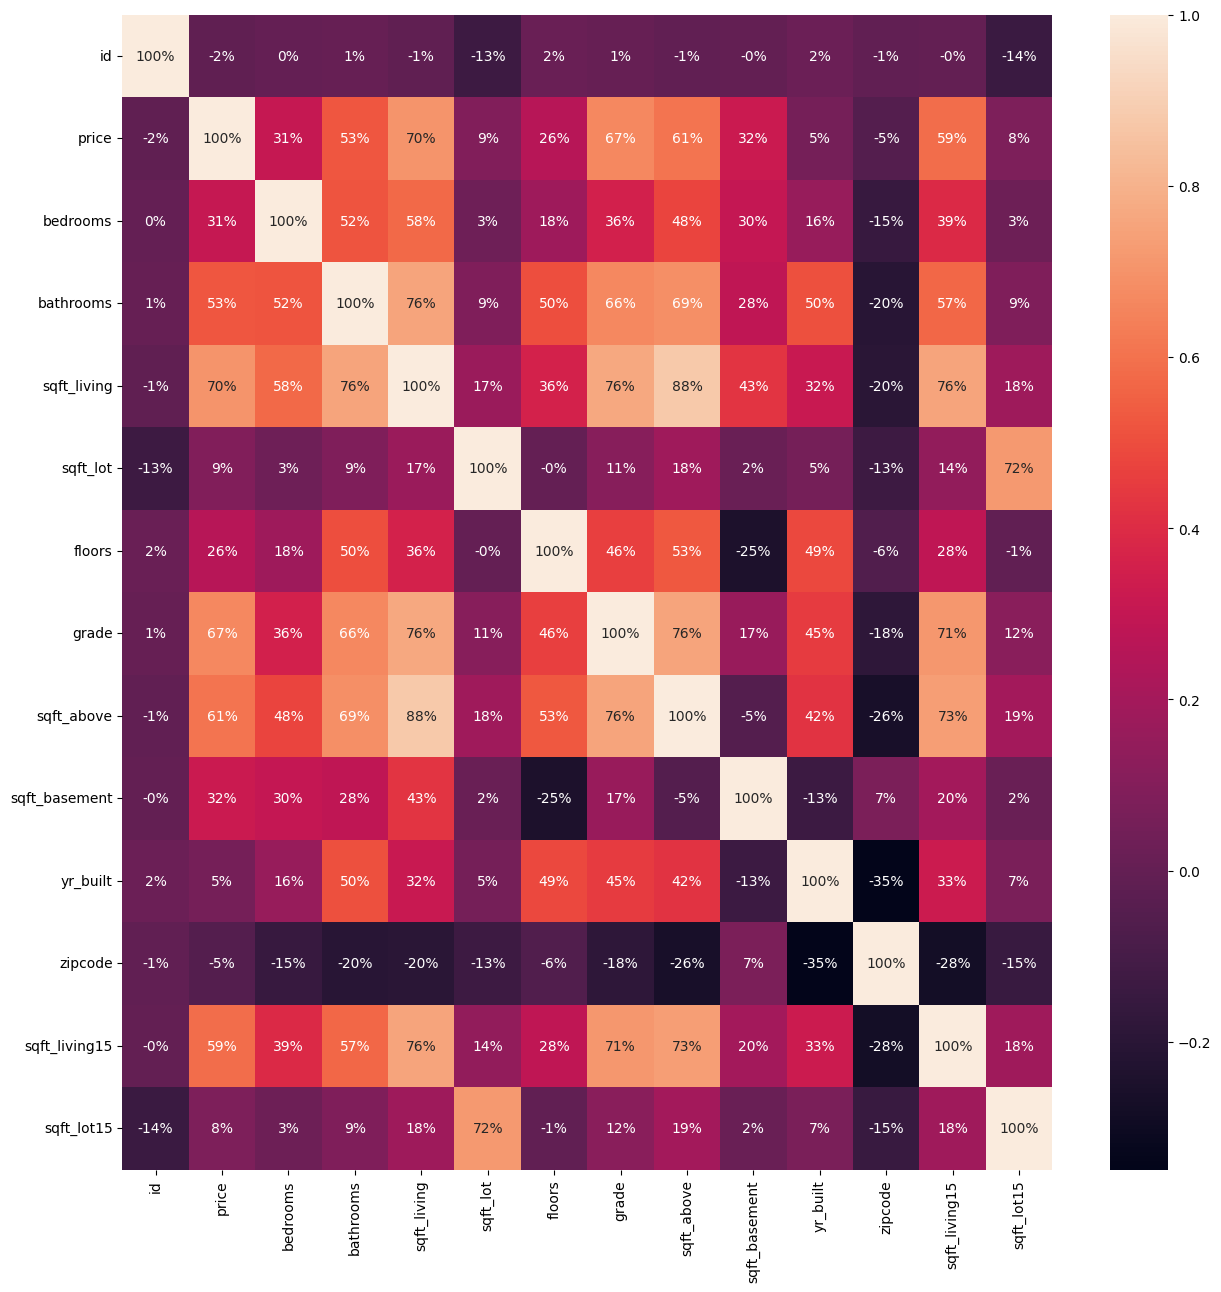

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(dataset.corr(), annot=True, fmt='.0%')


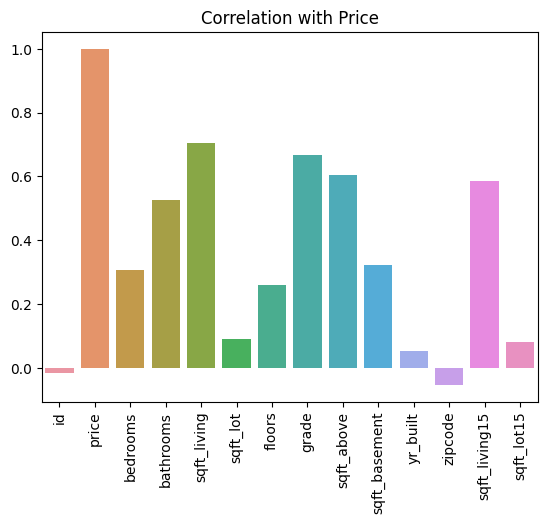

In [12]:

corr_matrix = dataset.corr()
price_corr = corr_matrix.loc['price', :]
sns.barplot(x=price_corr.index, y=price_corr.values)
plt.xticks(rotation=90)
plt.title('Correlation with Price')
plt.show()


The plot shows that the `sqft_living` feature has the most effect on the target (price). (68%)


### 4- Plotting unique values for each feature


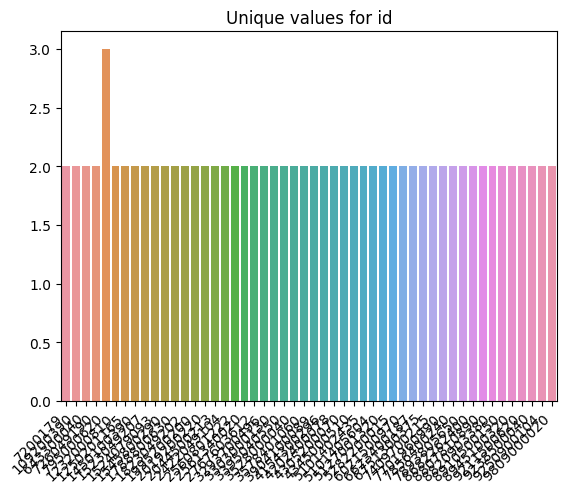

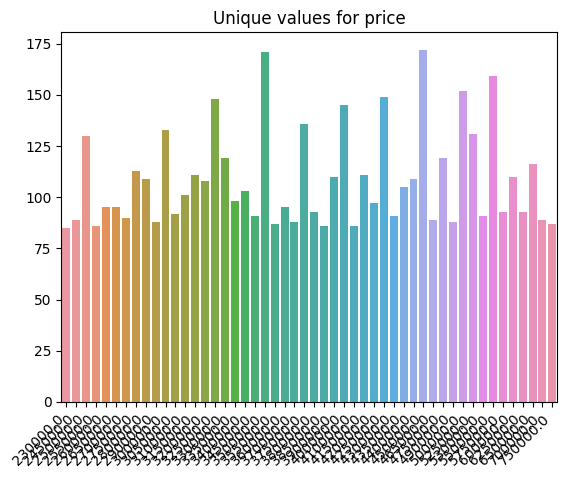

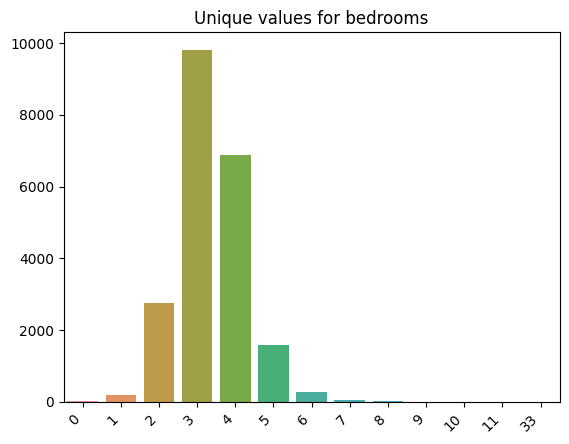

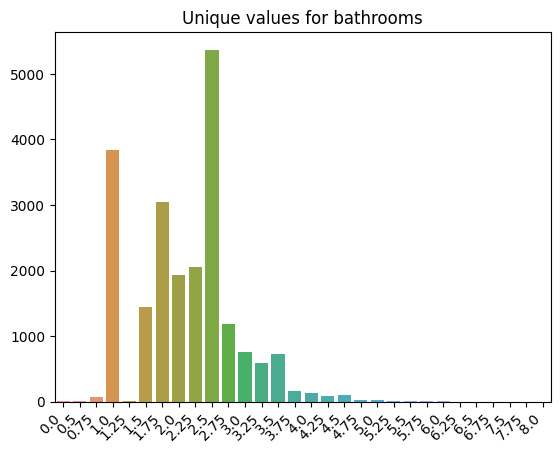

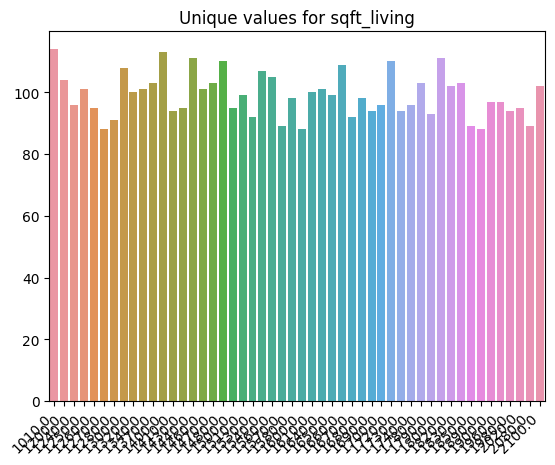

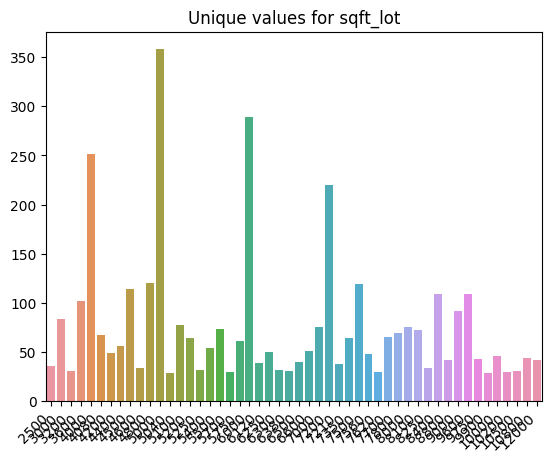

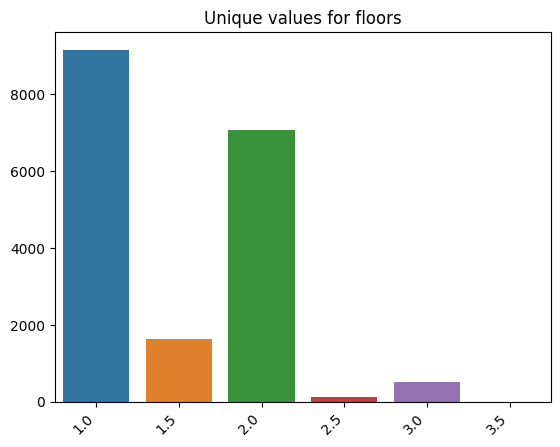

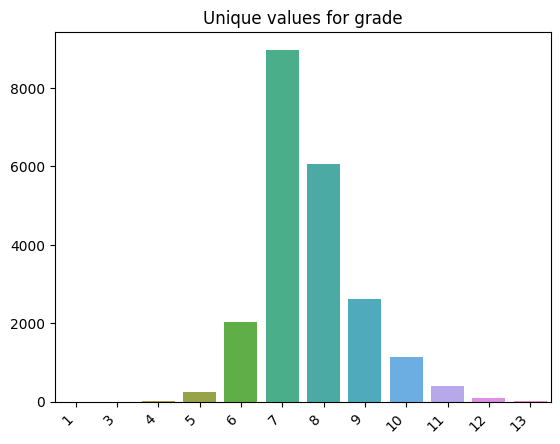

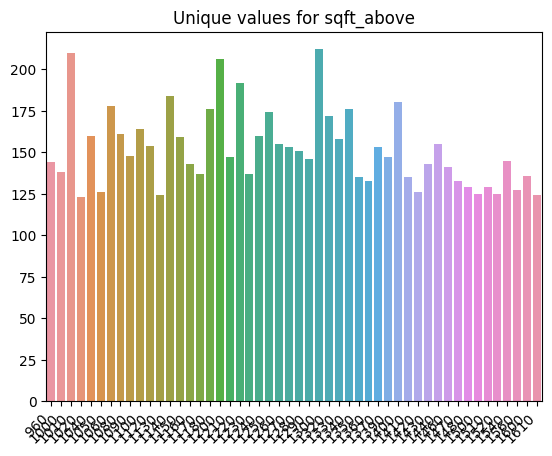

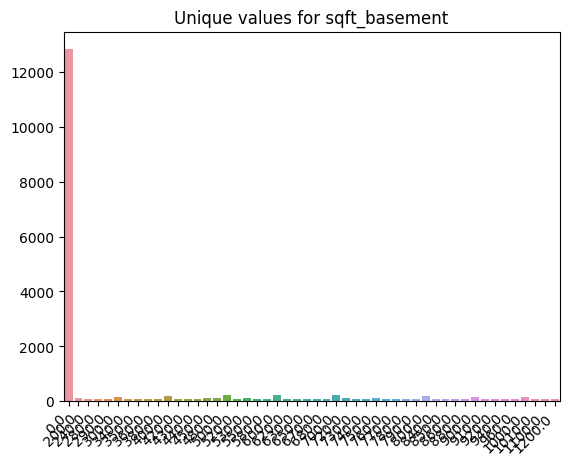

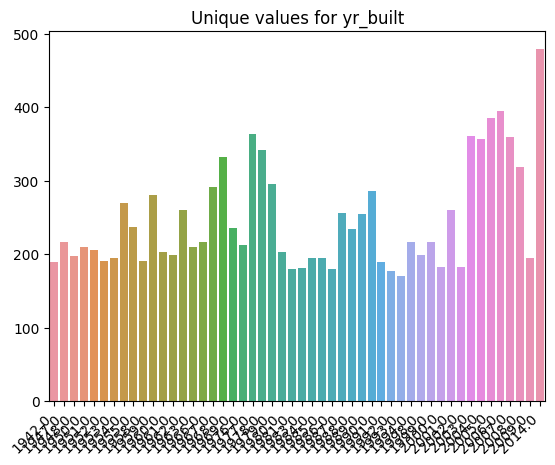

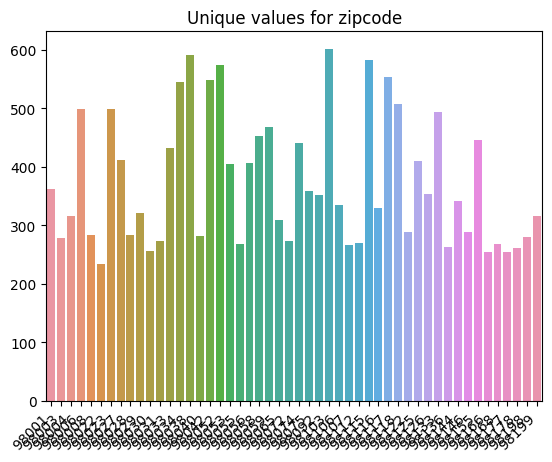

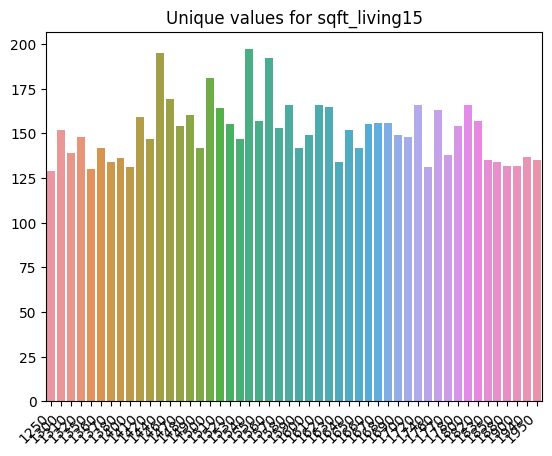

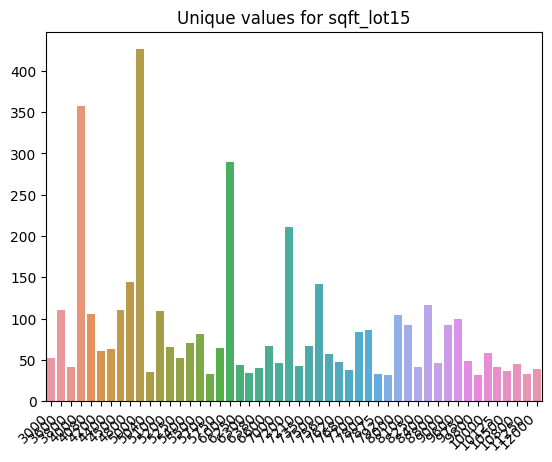

In [13]:

for col in dataset.columns:
    if dataset[col].dtype != 'object':  # Only consider non-object columns
        unique_values = dataset[col].value_counts().head(
            50)  # Limit to top 10 most frequent values
        if len(unique_values) > 90:  # Group the rest into an "other" category
            other_count = len(dataset[col]) - unique_values.sum()
            unique_values['Other'] = other_count
        plt.figure()
        ax = sns.barplot(x=unique_values.index, y=unique_values.values)
        ax.set(title=f'Unique values for {col}', xlabel=None, ylabel=None)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        plt.show()


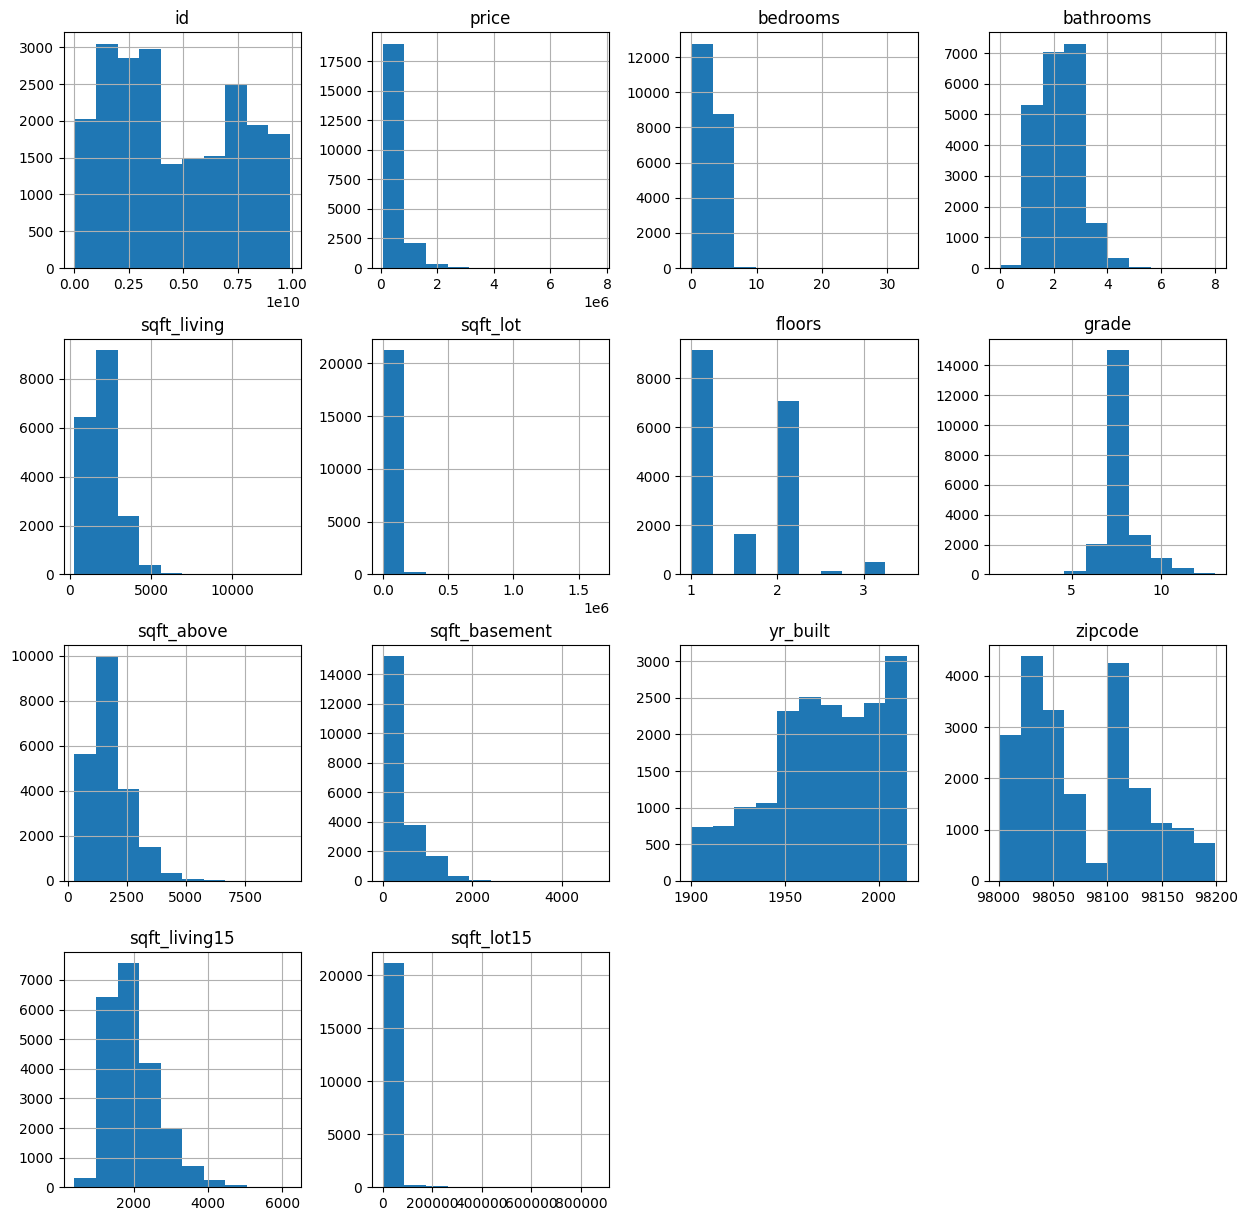

In [14]:
dataset.hist(figsize=(15, 15))
plt.show()


### 5- Plotting the relationship between the features using hexbin


           id      price
0  7129300520   221900.0
2  5631500400   180000.0
3  2487200875   604000.0
4  1954400510   510000.0
5  7237550310  1230000.0
       price      price
0   221900.0   221900.0
2   180000.0   180000.0
3   604000.0   604000.0
4   510000.0   510000.0
5  1230000.0  1230000.0
   bedrooms      price
0         3   221900.0
2         2   180000.0
3         4   604000.0
4         3   510000.0
5         4  1230000.0
   bathrooms      price
0        1.0   221900.0
2        1.0   180000.0
3        3.0   604000.0
4        2.0   510000.0
5        4.5  1230000.0
   sqft_living      price
0       1180.0   221900.0
2        770.0   180000.0
3       1960.0   604000.0
4       1680.0   510000.0
5       5420.0  1230000.0
   sqft_lot      price
0      5650   221900.0
2     10000   180000.0
3      5000   604000.0
4      8080   510000.0
5    101930  1230000.0
   floors      price
0     1.0   221900.0
2     1.0   180000.0
3     1.0   604000.0
4     1.0   510000.0
5     1.0  1230000.0
   g

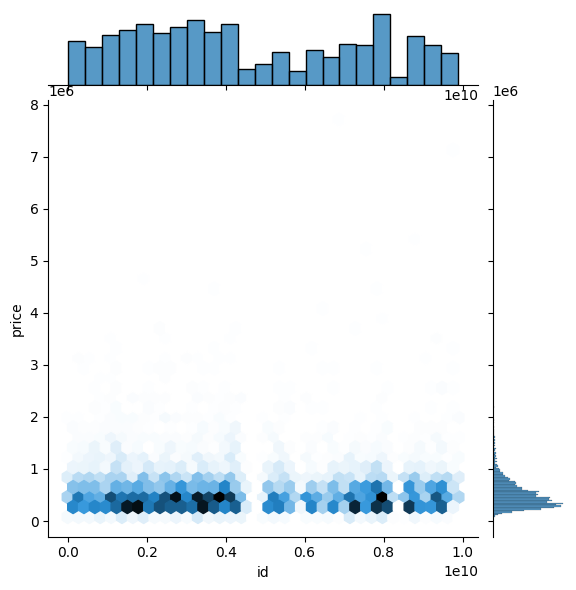

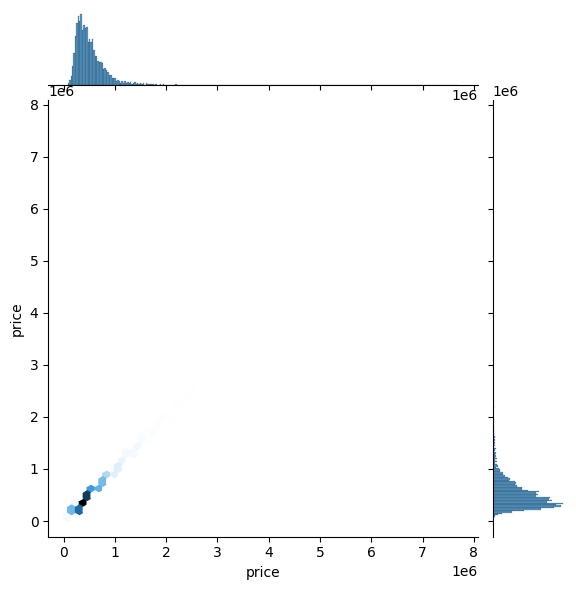

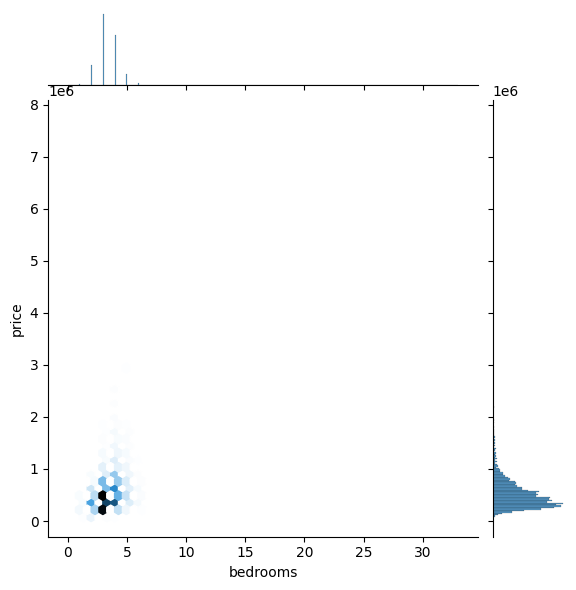

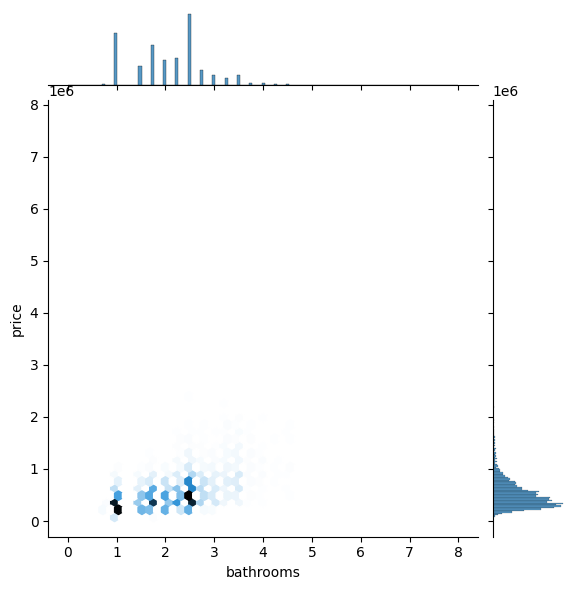

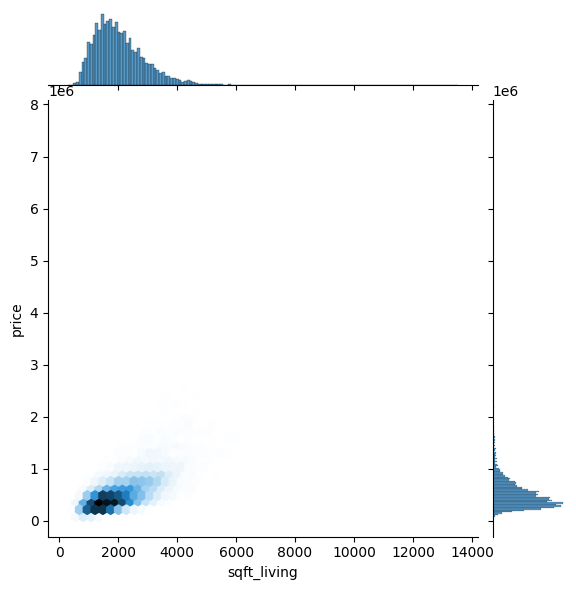

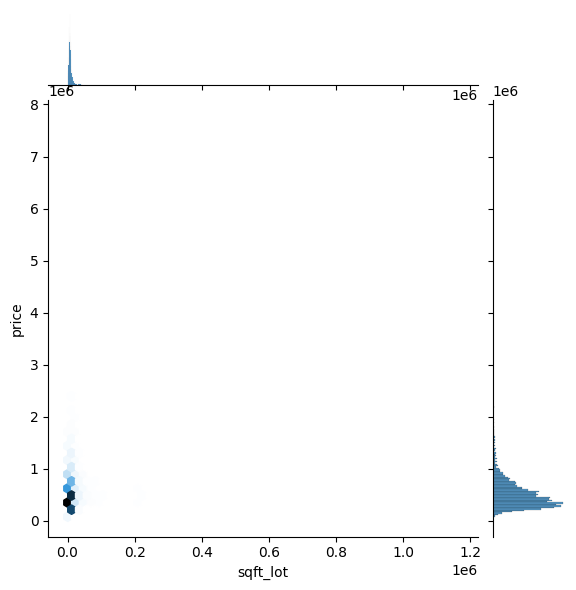

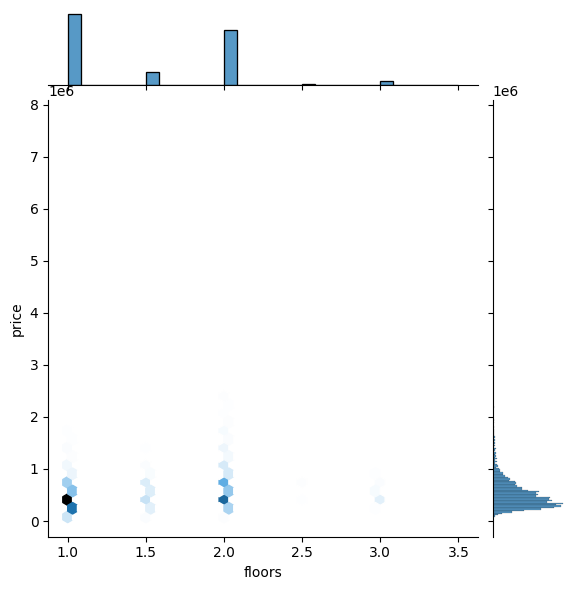

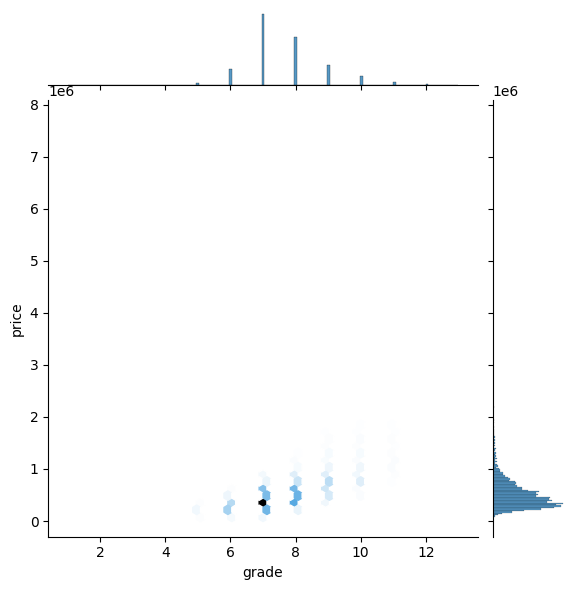

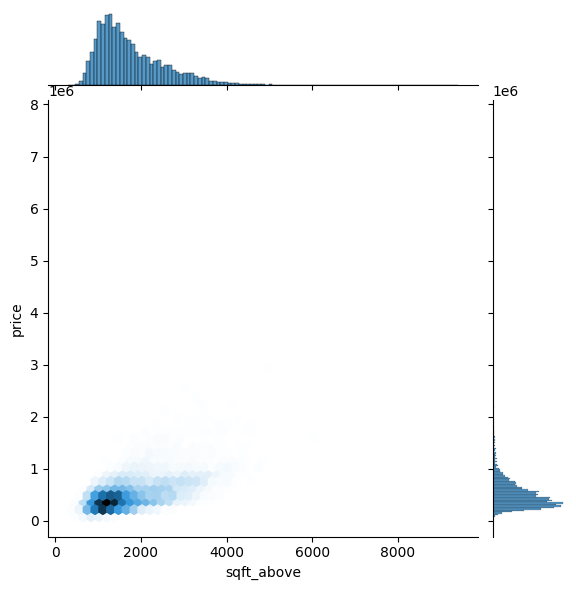

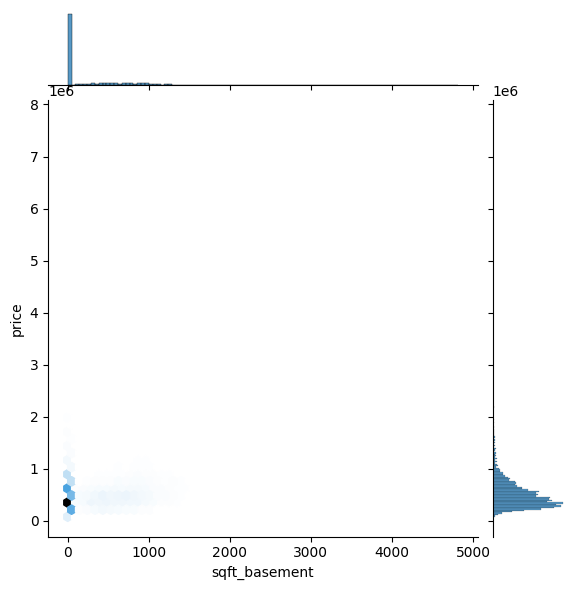

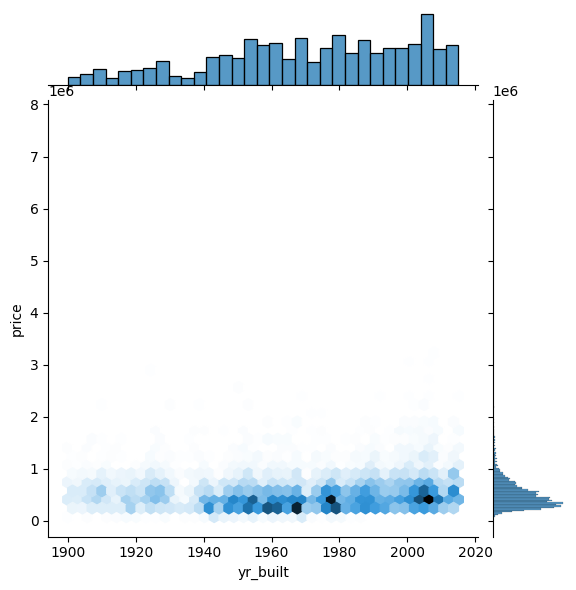

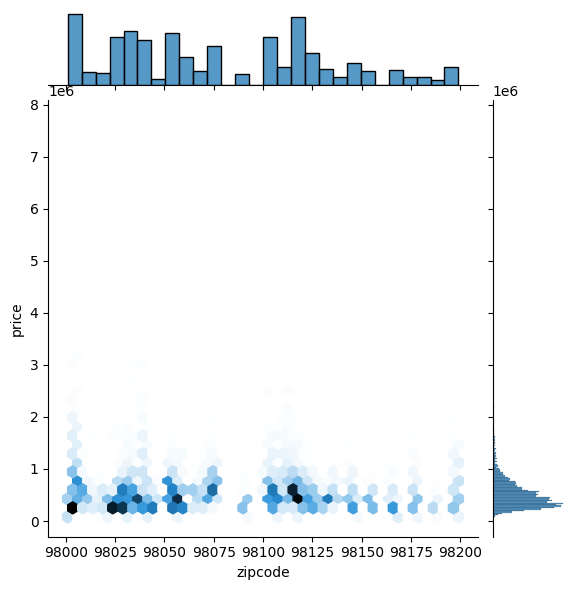

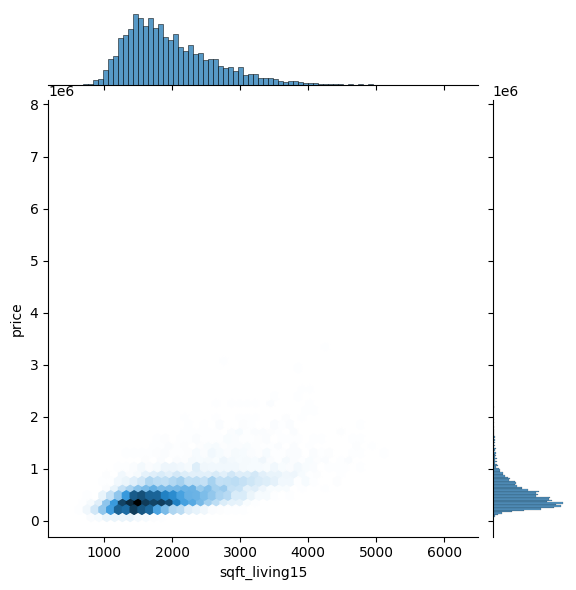

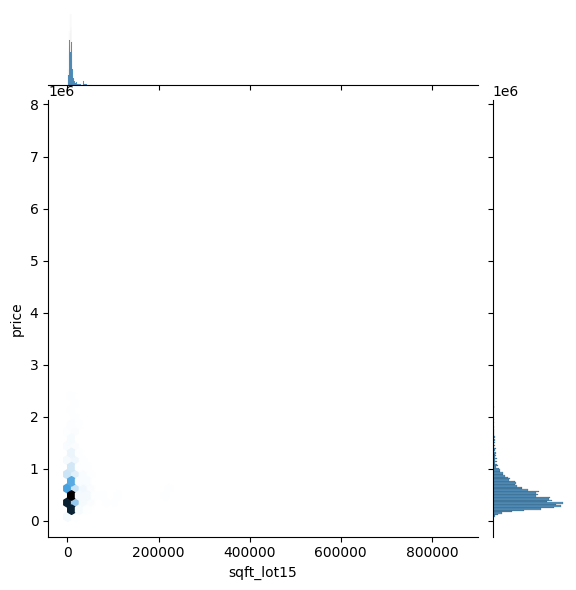

In [15]:
dataset.dropna(inplace=True)
numerical_cols = dataset.select_dtypes(include=['float', 'int']).columns

for col in numerical_cols:
    # Add this line to check the data being passed
    print(dataset[[col, 'price']].head())
    sns.jointplot(x=col, y='price', data=dataset, kind='hex')


### 6- Relationship between the features


I have used also `heatmap` plot which is the most notable plot to see correlation between target and features.


## Preprocessing


### 1- How to handle missing values


Handling missing values in data is an important step in data preprocessing. There are many ways to handle missing values. Some of them are as follows:

- Delete the rows which have missing values

In this case, we will lose a lot of data. So, it is not a good idea.
If the number of missing values is very small compared to the total size of the dataset, then it might be better to delete the rows or columns containing missing values. This method should be used only if the missing values are random and do not affect the analysis.

- Imputation: This method involves replacing the missing values with some estimated value. The estimated value can be the mean, median or mode of the non-missing values in the same column. Another method is to use regression models to predict the missing values based on the values of other columns.

changing missing value with mean -> has the problem of losing the variance and changing the distribution of the data.

changing missing value with mode -> has the problem of losing the variance and changing the distribution of the data.

- Using advanced imputation techniques: There are some advanced techniques like K-nearest neighbors (KNN) imputation, multiple imputation, and expectation-maximization (EM) imputation which can be used to impute missing values.

- Treating missing values as a separate category: In some cases, it may be appropriate to treat missing values as a separate category. For example, in a survey, if a respondent chooses not to answer a question, it may be appropriate to treat the missing value as a separate category.


### 2- Handling missing values


In [16]:
dataset = pd.read_csv(DATASET_PATH)
missing = dataset[dataset.isna().sum(axis=1) > 2]
display(missing)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,location,style,house_age
1008,1008,1008,1008,1624079104,20150402T000000,540000.0,3,2.25,NaN,217800,...,NaN,0,98024,47.5599,-121.911,2220,217800,Urban,Ranch,26
1109,1109,1109,1109,5416510060,20150306T000000,367000.0,4,2.50,2960.0,6219,...,NaN,0,98038,47.3603,-122.037,2960,5361,Urban,Colonial,16
1256,1256,1256,1256,993001629,20141117T000000,265000.0,3,2.75,1120.0,881,...,NaN,0,98103,47.6914,-122.343,1120,1087,Suburban,Ranch,23
1299,1299,1299,1299,8648220260,20150324T000000,284000.0,3,1.75,NaN,9600,...,NaN,0,98042,47.3594,-122.076,1680,9680,Urban,Contemporary,34
1352,1352,1352,1352,1823039205,20140624T000000,585000.0,3,2.50,NaN,100545,...,NaN,0,98070,47.4815,-122.470,1277,100545,Urban,Contemporary,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20913,20913,20913,20913,1773100967,20150223T000000,299999.0,3,2.25,NaN,1234,...,NaN,0,98106,47.5565,-122.363,1420,1234,Urban,Ranch,15
21049,21049,21049,21049,8956200770,20140723T000000,549950.0,4,3.50,NaN,9674,...,NaN,0,98001,47.2931,-122.264,2673,6500,Rural,Colonial,8
21182,21182,21182,21182,7299600950,20150408T000000,279950.0,3,2.50,NaN,4800,...,NaN,0,98092,47.2585,-122.201,2009,4800,Urban,Ranch,9
21395,21395,21395,21395,3879900754,20140915T000000,779000.0,3,2.50,NaN,1487,...,NaN,0,98119,47.6276,-122.359,1610,1297,Suburban,Victorian,13


In [17]:
dataset.drop(missing.index, inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset.describe()


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21517.000000,21517.000000,21517.000000,2.151700e+04,2.151700e+04,21517.000000,21517.000000,18521.000000,2.151700e+04,18519.000000,...,21517.000000,21113.000000,18524.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000
mean,10801.298276,10801.298276,10801.298276,4.578311e+09,5.398925e+05,3.366873,2.111679,2077.368879,1.510374e+04,1.492791,...,1788.069712,292.159096,1970.891168,83.941999,98077.949482,47.560108,-122.213883,1986.143421,12762.047683,51.005019
std,6239.025202,6239.025202,6239.025202,2.876253e+09,3.667220e+05,0.941886,0.780712,953.880117,4.145542e+04,0.538545,...,827.953548,442.792965,29.402826,400.625805,53.496461,0.138614,0.140867,685.252463,27280.474820,29.375067
min,0.000000,0.000000,0.000000,1.000102e+06,7.500000e+04,-5.000000,-5.000000,-33323.000000,5.200000e+02,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.000000
25%,5400.000000,5400.000000,5400.000000,2.123049e+09,3.215000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470800,-122.328000,1490.000000,5100.000000,25.000000
50%,10799.000000,10799.000000,10799.000000,3.904921e+09,4.500000e+05,3.000000,2.250000,1914.000000,7.615000e+03,1.500000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,47.000000
75%,16204.000000,16204.000000,16204.000000,7.305900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.067900e+04,2.000000,...,2210.000000,560.000000,1996.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10080.000000,71.000000
max,21612.000000,21612.000000,21612.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,122.000000


In [18]:
numeric_cols = dataset.select_dtypes(include=np.number).columns.tolist()
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(dataset[numeric_cols])
imputed = pd.DataFrame(imputed, columns=numeric_cols)
imputed.describe()


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
count,21517.000000,21517.000000,21517.000000,2.151700e+04,2.151700e+04,21517.000000,21517.000000,21517.000000,2.151700e+04,21517.000000,...,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000,21517.000000
mean,10801.298276,10801.298276,10801.298276,4.578311e+09,5.398925e+05,3.366873,2.111679,2071.363052,1.510374e+04,1.492234,...,1788.069712,291.953032,1970.969875,83.941999,98077.949482,47.560108,-122.213883,1986.143421,12762.047683,51.005019
std,6239.025202,6239.025202,6239.025202,2.876253e+09,3.667220e+05,0.941886,0.780712,918.307843,4.145542e+04,0.519972,...,827.953548,439.960247,28.480347,400.625805,53.496461,0.138614,0.140867,685.252463,27280.474820,29.375067
min,0.000000,0.000000,0.000000,1.000102e+06,7.500000e+04,-5.000000,-5.000000,-33323.000000,5.200000e+02,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.000000
25%,5400.000000,5400.000000,5400.000000,2.123049e+09,3.215000e+05,3.000000,1.750000,1450.000000,5.040000e+03,1.000000,...,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.470800,-122.328000,1490.000000,5100.000000,25.000000
50%,10799.000000,10799.000000,10799.000000,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.615000e+03,1.400000,...,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,47.000000
75%,16204.000000,16204.000000,16204.000000,7.305900e+09,6.450000e+05,4.000000,2.500000,2519.000000,1.067900e+04,2.000000,...,2210.000000,560.000000,1995.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10080.000000,71.000000
max,21612.000000,21612.000000,21612.000000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,122.000000


### 3. In numericals do we have to use standardizing or normalizing ?


Normalization means scaling the values of the features to a fixed range. For example, we can scale the values of the features to the range of [0, 1] or [-1, 1]. This method is useful when we have no outliers and the data lies in a fixed range. We can use the MinMaxScaler method to do this. We can't use normarlziation when we are not using algorithms such as KNN or Neural Networks which are based on distance.
Normalization can also help to speed up convergence during training and improve the performance of some models.

Standardization scales the numerical data to have a mean of 0 and a standard deviation of 1. This can be useful when the data is normally distributed, and the scale of the data is important. Standardization can help to center the data around 0, making it easier to interpret the coefficients of the model. It can also help to improve the performance of some models that are sensitive to the scale of the input features.


Here we use standardization because of the gaussian distribution of the data.


In [19]:
# standardized = StandardScaler().fit_transform(imputed.drop('price', axis=1))
# standardized = pd.DataFrame(standardized, columns=imputed.columns[:-1])
# standardized['price'] = imputed['price']
# standardized.describe()
# standardized = (df - imputed.mean(numeric_only = True)) / df.std(numeric_only = True)
standardized = (imputed - imputed.mean(numeric_only=True)) / \
    imputed.std(numeric_only=True)
standardized.head()


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,-1.731248,-1.731248,-1.731248,0.886914,-0.867121,-0.389509,-1.423929,-0.970658,-0.228046,-0.946656,...,-0.734425,-0.663590,-0.560733,-0.209527,1.870227,-0.352837,-0.306085,-0.942928,-0.260701,0.544509
1,-1.731087,-1.731087,-1.731087,0.638257,-0.005161,-0.389509,0.177173,0.542995,-0.189643,-0.946656,...,0.461294,0.245583,-0.504554,4.760198,0.879507,1.160713,-0.746217,-0.432167,-0.187792,0.680679
2,-1.730927,-1.730927,-1.730927,0.366167,-0.981377,-1.451208,-1.423929,-1.417132,-0.123114,-0.946656,...,-1.229622,-0.663590,-1.333196,-0.209527,-0.933697,1.282634,-0.135711,1.070929,-0.172286,1.293443
3,-1.730767,-1.730767,-1.730767,-0.727026,0.174812,0.672191,1.137834,-0.121270,-0.243725,-0.946656,...,-0.891439,1.404779,-0.209614,-0.209527,1.085128,-0.283580,-1.271537,-0.913741,-0.284528,0.204084
4,-1.730607,-1.730607,-1.730607,-0.912267,-0.081513,-0.389509,-0.143048,-0.426178,-0.169429,-0.946656,...,-0.130526,-0.663590,0.562849,-0.209527,-0.073827,0.408988,1.198885,-0.271642,-0.192777,-0.544850


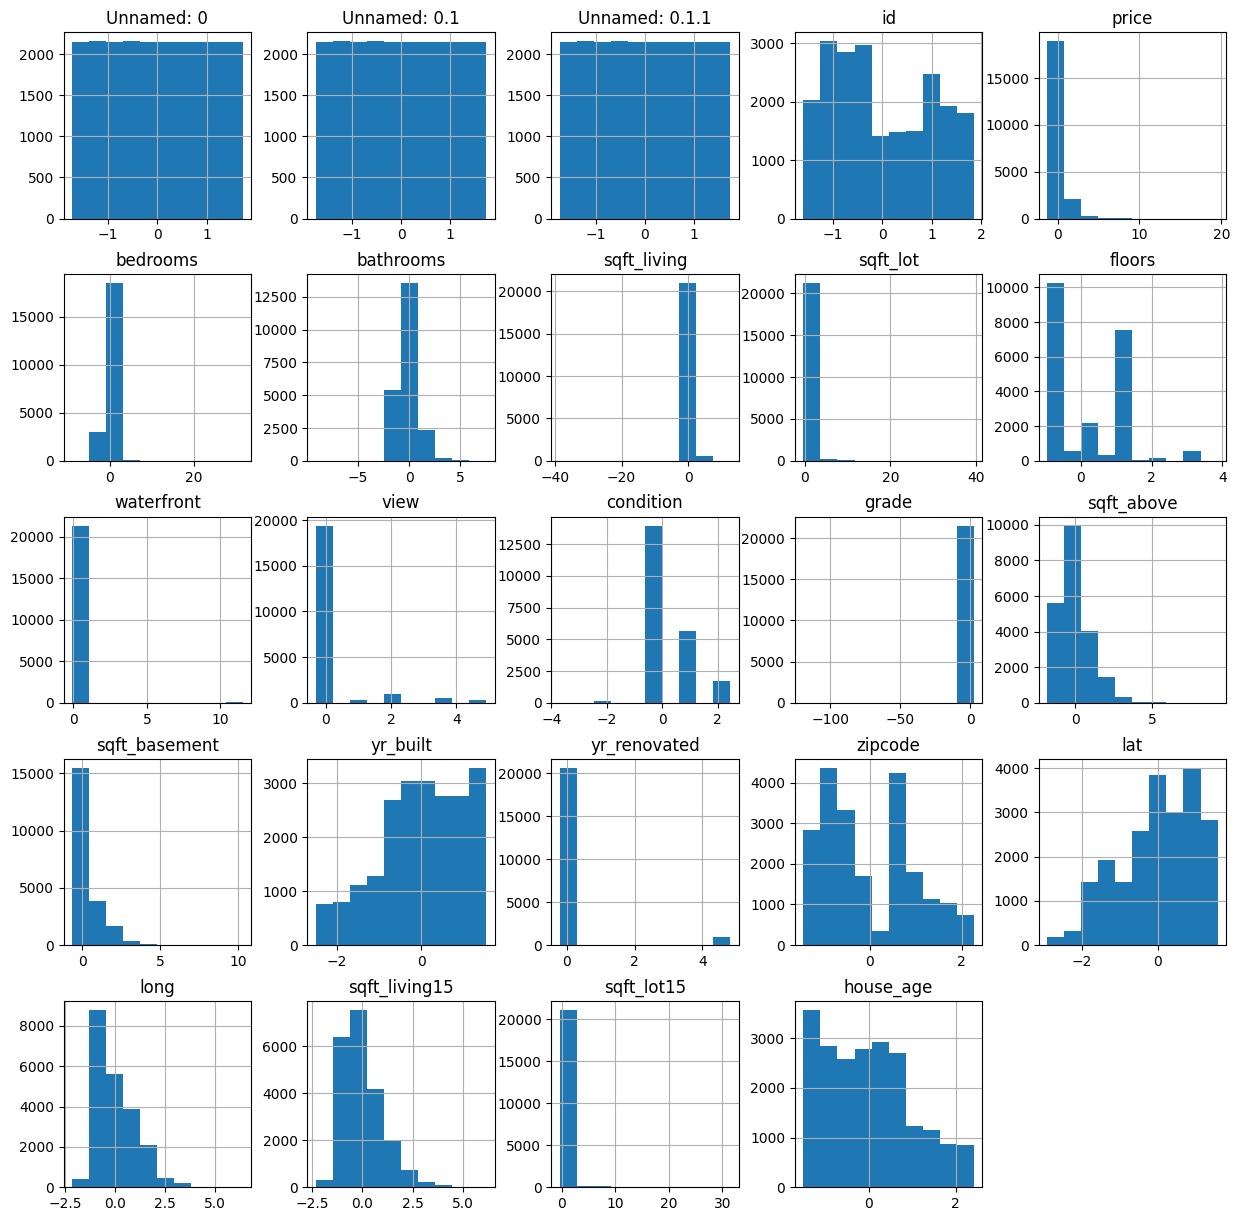

In [20]:
standardized.hist(figsize=(15, 15))
plt.show()


### 4. How to work with String or Object variables ?


There are many ways to encode the categorical features. Some of them are as follows:

`Label Encoding`: Assign a number to each category.

This method is useful when the categories have an order. For example, if we have a feature with 3 categories, we can encode them as follows:

- Category 1: 0
- Category 2: 1
- Category 3: 2

`One-Hot Encoding`: Create a new feature for each category.

This method is useful when the categories don't have an order. It is the most useful method for the algorithms that use the distance between the data points, such as KNN. For example, if we have a feature with 3 categories, we can encode them as follows:

- Category 1: 1, 0, 0
- Category 2: 0, 1, 0
- Category 3: 0, 0, 1

`Binary Encoding`: Encode the categories using binary numbers.

This method is useful when the categories don't have an order. It is somehow similar to the One-Hot Encoding method. For example, if we have a feature with 3 categories, we can encode them as follows:

- Category 1: 00
- Category 2: 01
- Category 3: 10

`Frequency Encoding`: Encode the categories using the frequency of the categories.

This method is useful when the categories don't have an order. For example, if we have a feature with 3 categories, we can encode them as follows:

- Category 1: 0.5
- Category 2: 0.25
- Category 3: 0.25

`Target Encoding`: Encode the categories using the target mean of the categories.

This method is useful when the categories don't have an order. For example, if we have a feature with 3 categories, we can encode them as follows:

- Category 1: 0.5
- Category 2: 0.25
- Category 3: 0.75


Here I Labeled all object types, iterate over them and encode each of them unique vlaue.


In [21]:
from sklearn.preprocessing import LabelEncoder

standardized1 = standardized

le = LabelEncoder()

df_objects = standardized1.select_dtypes(include=['object'])

for col in df_objects.columns:
    standardized1[col] = le.fit_transform(standardized1[col].astype(str))

standardized1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21517 entries, 0 to 21516
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      21517 non-null  float64
 1   Unnamed: 0.1    21517 non-null  float64
 2   Unnamed: 0.1.1  21517 non-null  float64
 3   id              21517 non-null  float64
 4   price           21517 non-null  float64
 5   bedrooms        21517 non-null  float64
 6   bathrooms       21517 non-null  float64
 7   sqft_living     21517 non-null  float64
 8   sqft_lot        21517 non-null  float64
 9   floors          21517 non-null  float64
 10  waterfront      21517 non-null  float64
 11  view            21517 non-null  float64
 12  condition       21517 non-null  float64
 13  grade           21517 non-null  float64
 14  sqft_above      21517 non-null  float64
 15  sqft_basement   21517 non-null  float64
 16  yr_built        21517 non-null  float64
 17  yr_renovated    21517 non-null 

### 5. Removing columns


By looking at heatmap result I will drop the columns which have low correlation so I will remove : `Unnammed id sqft_lot condition yr_built zipcode long sqft_lot15house_age ` which where less than 10%


In [22]:
# 'yr_built', 'zipcode'
standardized.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'id', 'sqft_lot',
                  'condition', 'long', 'sqft_lot15'], axis=1, inplace=True)
standardized.info()
# standardized.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21517 entries, 0 to 21516
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21517 non-null  float64
 1   bedrooms       21517 non-null  float64
 2   bathrooms      21517 non-null  float64
 3   sqft_living    21517 non-null  float64
 4   floors         21517 non-null  float64
 5   waterfront     21517 non-null  float64
 6   view           21517 non-null  float64
 7   grade          21517 non-null  float64
 8   sqft_above     21517 non-null  float64
 9   sqft_basement  21517 non-null  float64
 10  yr_built       21517 non-null  float64
 11  yr_renovated   21517 non-null  float64
 12  zipcode        21517 non-null  float64
 13  lat            21517 non-null  float64
 14  sqft_living15  21517 non-null  float64
 15  house_age      21517 non-null  float64
dtypes: float64(16)
memory usage: 2.6 MB


### 6.Splitting the dataset into train and test sets


Some common percentages for splitting the dataset into train and test sets are as follows: where the first parameter is percentage for train and second is for test

- 90:10
- 80:20
- 67:33
- 50:50


There are some ways to split the dataset into train and test sets. Some of them are as follows:

Randomly split the dataset into train and test sets

    This method is the most common method. But it has a problem. If we split the dataset randomly, the train and test sets may not have the same distribution.

Split the dataset based on the time

    This method is useful when we have a time series dataset. But it is not useful in this case.

Split the dataset based on the target

    This method is useful when we have an imbalanced dataset.


Here we use first method.

There exists various methods to split the dataset randomly. The most common methods are presented below:

- train_test_split method

- randn method of the numpy library

- sample method of the pandas library

The first method is used here.

`random_state` is here to make results reproducible, If we don't set the `random_state`, the results will be different every time we run the code.


In [23]:
X_train, X_test, y_train, y_test = train_test_split(standardized.drop(
    'price', axis=1), standardized['price'], test_size=0.25, random_state=39)


### 7- Validate Set

A validation set, also known as a development set, is a portion of a dataset that is used to evaluate the performance of a machine learning model during the training phase. It is usually a subset of the original dataset and is used to tune the hyperparameters of the model to optimize its performance. The validation set is distinct from the test set, which is used to evaluate the final performance of the model after it has been trained and optimized on the validation set. By using a validation set, it is possible to prevent overfitting, where the model becomes too specialized to the training data and performs poorly on new data.


# Phase 1 : Linear Regression


In [24]:
import pandas as pd
import math


Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the intercept($\alpha$) and slope($\beta$) by minimizing the derivation of the RSS function:

- step 1: Compute RSS of the training data

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} \* x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in term of $\underline{\alpha}$ and $\underline{\beta}$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} \* x_i) = 0$$
$$ \to \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$

$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$
(1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$

$$ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x}$$


#### 1-At the beginning of the notebook file, the formula for calculating α and β parameters for a 1st degree regression model is placed. Review the above mathematical calculations, and explain why the values given for the variables α and β are obtained?


RSS stands for Residual Sum of Squares, which is a common evaluation metric used in regression analysis. It measures the difference between the predicted values and the actual values of the target variable. Mathematically, it is the sum of the squared differences between the predicted and actual values of the target variable for each observation in the dataset.

In other words, RSS measures the amount of variance in the data that is not explained by the regression model. A lower RSS indicates a better fit of the model to the data.In the simple linear regression model, the goal is to minimize the RSS (Residual Sum of Squares) between the predicted values and the actual values of the output variable.

- In the first step we compute RSS using the formul, In step 2 we take derivative and put the result equal to zero (0), to minimize alpha and beta we solve two equations and see results.


In [25]:
def simple_linear_regression(input_feature, output):
    # TO DO:

    # compute the sum of input_feature and output
    input_sum = input_feature.sum()
    output_sum = output.sum()

    # compute the product of the output and the input_feature and its sum
    product = (input_feature * output).sum()

    # compute the squared value of the input_feature and its sum
    input_squared_sum = (input_feature ** 2).sum()

    # use the formula for the slope
    slope = (product - (output_sum * input_sum) / len(input_feature)) / \
        (input_squared_sum - (input_sum ** 2) / len(input_feature))

    # use the formula for the intercept
    intercept = output.mean() - slope * input_feature.mean()

    return (intercept, slope)


In [26]:
def get_regression_predictions(input_feature, intercept, slope):
    # TO DO:

    # calculate the predicted values:
    predicted_values = input_feature * slope + intercept

    return (predicted_values)


Now that we have a model and can make predictions let's evaluate our model using Root Mean Square Error (RSME). RMSE is the square root of the mean of the squared differences between the residuals and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:


In [27]:
def get_root_mean_square_error(predicted_values, output):
    # TO DO:

    # Compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = output - predicted_values

    # square the residuals and add them up
    squared_residuals = (residuals ** 2).sum()

    # find the mean of the above phrase
    mean_squared_residuals = squared_residuals / len(output)

    # calculate the root
    RMSE = math.sqrt(mean_squared_residuals)

    return (RMSE)


AS you might guessed, the RMSE has no bound and it is not easy to find out the percentage of fitting the model into data with it. instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. Matematically, the R2 score formula is shown as follows:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$


In this step, complete the following function to calculate the R2 score of a given input_feature, output, intercept, and slope:


In [28]:
def get_r2_score(predicted_values, output):
    # TO DO:

    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = output - predicted_values

    # square the residuals and add them up -> SSres
    SSres = (residuals ** 2).sum()

    # compute the SStot
    SStot = ((output - output.mean()) ** 2).sum()

    # compute the R2 score value
    R2_score = 1 - (SSres / SStot)

    return (R2_score)


Now calculate the fitness of the model and explain the outputs


In [29]:
# TO DO:
designated_feature_list = ['yr_built', 'grade', 'zipcode', 'sqft_living']


for feature in designated_feature_list:
    # extract the training and test data for the current feature
    X_train_feature = X_train[feature]
    X_test_feature = X_test[feature]

    # train the model on the training data
    intercept, slope = simple_linear_regression(X_train_feature, y_train)

    # get the predicted values for the training and test data
    train_predictions = get_regression_predictions(
        X_train_feature, intercept, slope)
    test_predictions = get_regression_predictions(
        X_test_feature, intercept, slope)

    # calculate the RMSE and R2 score for the training and test data
    train_RMSE = get_root_mean_square_error(train_predictions, y_train)
    train_R2 = get_r2_score(train_predictions, y_train)
    test_RMSE = get_root_mean_square_error(test_predictions, y_test)
    test_R2 = get_r2_score(test_predictions, y_test)

    print(f'*** Feature: {feature}')
    print(f'RSME: {train_RMSE}')
    print(f'R2 Score: {train_R2}\n')


*** Feature: yr_built
RSME: 0.9869637044246387
R2 Score: 0.0031944596279944726

*** Feature: grade
RSME: 0.9247373968970994
R2 Score: 0.12492571504392436

*** Feature: zipcode
RSME: 0.9869093066187983
R2 Score: 0.0033043371030994084

*** Feature: sqft_living
RSME: 0.747778588009924
R2 Score: 0.4277917299598244



#### 2.After completing the specified sections in the notebook, a 1st order regression model is built. Since the regression function is made of order 1, only one feature can be selected as the input of this function. In your opinion, which feature gives us a more accurate output than other features? Explain the reason for your choice


RMSE (Root Mean Squared Error) and the R2 Score (coefficient of determination)

- The lower the RMSE, the better the model's performance. Therefore, a lower RMSE value is desirable.

- The closer the R2 Score is to 1, the better the model fits the data. Hence, a higher R2 Score is preferred.

> Comparing the features, it appears that "sqft_living" has the lowest RMSE value (0.747778588009924) and the highest R2 Score (0.4277917299598244). Therefore, if we have to choose one parameter based on these metrics alone, "sqft_living" seems to be the most informative feature for your model.


#### 3.After selecting the appropriate feature from the train data and predicting the test data, we must determine a criterion to evaluate the efficiency of the obtained output. Since our model is linear regression and we did not perform the classification operation on it, it is not possible to use the efficiency evaluation methods related to classification. Read about RSS, MSE, RMSE and R2 score methods and explain each one in your report.


1- Residual Sum of Squares (RSS):

Residual Sum of Squares is the sum of the squares of the difference between the predicted values and the actual values. It measures the total amount of error in the model. The formula for RSS is:

RSS = Σ (y - ŷ)^2

where:

y: actual value

ŷ: predicted value

2-Mean Squared Error (MSE):

Mean Squared Error is the average of the sum of the squared difference between the predicted values and the actual values. It measures the average amount of error in the model. The formula for MSE is:

MSE = (1/n) Σ (y - ŷ)^2

where:

y: actual value

ŷ: predicted value

n: number of data points

3-Root Mean Squared Error (RMSE):

Root Mean Squared Error is the square root of the mean squared error. It gives us the value in the same unit as the target variable. The formula for RMSE is:

RMSE = sqrt((1/n) Σ (y - ŷ)^2)

where:

y: actual value

ŷ: predicted value

n: number of data points

4-R-squared (R2) Score:

R-squared (R2) Score is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variable(s). It measures the goodness of fit of the

model. The R2 score varies between 0 and 1, with a higher value indicating a better fit. The formula for R2 score is:

R2 = 1 - (RSS/TSS)

where:

RSS: Residual Sum of Squares

TSS: Total Sum of Squares (sum of squares of the difference between the actual values and the mean value)


#### 4.Using the RMSE method and R2 score, evaluate the predicted values. Do the above operations on the built_yr, bathrooms and zipcode attributes. What conclusions do you have from the obtained values?


In [30]:
# designated features
designated_feature_list = ['yr_built', 'bathrooms', 'zipcode']


# iterate over each feature and evaluate the model
for feature in designated_feature_list:
    X_train_feature = X_train[feature]
    X_test_feature = X_test[feature]

    # train the model on the training data
    intercept, slope = simple_linear_regression(X_train_feature, y_train)

    # get the predicted values for the training and test data
    train_predictions = get_regression_predictions(
        X_train_feature, intercept, slope)
    test_predictions = get_regression_predictions(
        X_test_feature, intercept, slope)

    # calculate the RMSE and R2 score for the training and test data
    train_RMSE = get_root_mean_square_error(train_predictions, y_train)
    train_R2 = get_r2_score(train_predictions, y_train)
    test_RMSE = get_root_mean_square_error(test_predictions, y_test)
    test_R2 = get_r2_score(test_predictions, y_test)

    # print the results
    print(f'*** Feature: {feature}')
    print(f'Test RMSE: {test_RMSE:.2f}')
    print(f'Test R2 Score: {test_R2:.2f}\n')


*** Feature: yr_built
Test RMSE: 1.03
Test R2 Score: -0.00

*** Feature: bathrooms
Test RMSE: 0.89
Test R2 Score: 0.26

*** Feature: zipcode
Test RMSE: 1.03
Test R2 Score: 0.00



In [31]:
X_train_feature = X_train['sqft_living']
intercept, slope = simple_linear_regression(X_train_feature, y_train)
X_test_feature = X_test['sqft_living']

train_predictions = get_regression_predictions(
    X_train_feature, intercept, slope)
test_predictions = get_regression_predictions(
    X_test_feature, intercept, slope)


In [32]:
y_test.head()


15199   -0.490542
15293   -0.174226
6628    -1.014099
20857   -0.436141
17880   -0.539625
Name: price, dtype: float64

# Phase 2 : Clasificatin


In this section, we will train, test and evaluate the models. We will use the following models:

- Logistic Regression
- KNN
- Decision Tree


To create the new target column "level_price", you can use the following code:


In [33]:
median_price = standardized['price'].median()
standardized['level_price'] = np.where(
    standardized['price'] > median_price, 'HIGH', 'LOW')
X_train, X_test, y_train, y_test = train_test_split(standardized.drop(
    'level_price', axis=1), standardized['level_price'], test_size=0.25, random_state=39)


#### Logistic Regression

Logistic regression is a linear model for classification and it usually used when the target is binary. The output of the logistic regression is between 0 and 1 and it is calculated using the sigmoid function. The sigmoid function is as follows:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

where $z$ is the activation function. The activation function is calculated using the following formula:

$$z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$

where $w_i$ is the weight of the $i^{th}$ feature, $x_i$ is the value of the $i^{th}$ feature, $b$ is the bias and $n$ is the number of features.


In [34]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
print(
    f'Logistic Regression Accuracy: {logistic.score(X_test, y_test) * 100:5.2f}%')


Logistic Regression Accuracy: 99.48%


#### KNN

KNN stands for k-nearest neighbors, which is a machine learning algorithm used for both regression and classification problems. It is a non-parametric algorithm that makes predictions based on the k-nearest neighbors in the feature space. In other words, it looks at the k closest data points to the new data point and predicts the value of the target variable based on the majority class (for classification) or the mean (for regression) of the k neighbors. The choice of k is a hyperparameter that can be tuned to improve the performance of the model. KNN is often used for problems with a large number of input features and has been shown to perform well on a variety of dataset


In [35]:
knn = KNeighborsClassifier(n_neighbors=70)
knn.fit(X_train, y_train)
print(f'KNN Accuracy: {knn.score(X_test, y_test) * 100:5.2f}%')


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy: 89.89%


#### Decision Tree

A decision tree is a type of supervised learning algorithm that is mostly used for classification and regression analysis. It is a tree-like model that is constructed by recursively partitioning the input data into subsets based on the values of different input features. Each internal node of the tree represents a test on a feature, each branch represents the outcome of the test, and each leaf node represents a class label or a numerical value that is the prediction of the tree. The goal of a decision tree is to create a model that can predict the value of a target variable based on several input variables. Decision trees are easy to understand, interpret and visualize, and they can handle both categorical and numerical data.


In [36]:
tree = DecisionTreeClassifier(random_state=54)
dt_parameters = {
    'criterion': ['entropy'],
    'max_depth': range(5, 10),
    'min_samples_split': range(5, 10),
    'min_samples_leaf': range(1, 4),
    'random_state': [1]
}

model = GridSearchCV(tree, dt_parameters, scoring='accuracy')
model.fit(X_train, y_train)
print(f'Decision Tree Accuracy: {model.score(X_test, y_test) * 100:5.2f}%')


Decision Tree Accuracy: 100.00%


### 1- Finding the accuracy of the models using confusion matrix


#### 1.1.Logistic Regression


Text(50.722222222222214, 0.5, 'Truth')

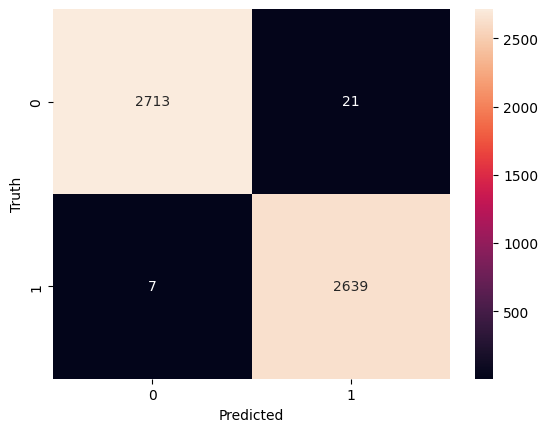

In [37]:
cm = confusion_matrix(y_test, logistic.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


As it is shown above, the accuracy of the `Logistic Regression` model can be calculated using the following formula:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{2639+2713}{2639+2713+21+7} = 99.47\%$$

where $TP$ is the number of true positives, $TN$ is the number of true negatives, $FP$ is the number of false positives and $FN$ is the number of false negatives.


#### 1.2.KNN


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(50.722222222222214, 0.5, 'Truth')

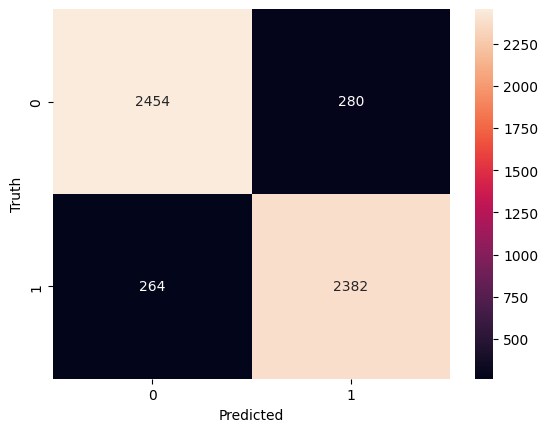

In [38]:
cm = confusion_matrix(y_test, knn.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


As it is shown above, the accuracy of the `KNN` model can be calculated using the following formula:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{2382+2454}{2454+280+2382+264} = 89.8\%$$

where $TP$ is the number of true positives, $TN$ is the number of true negatives, $FP$ is the number of false positives and $FN$ is the number of false negatives.


#### 1.3.Decision Tree


Text(50.722222222222214, 0.5, 'Truth')

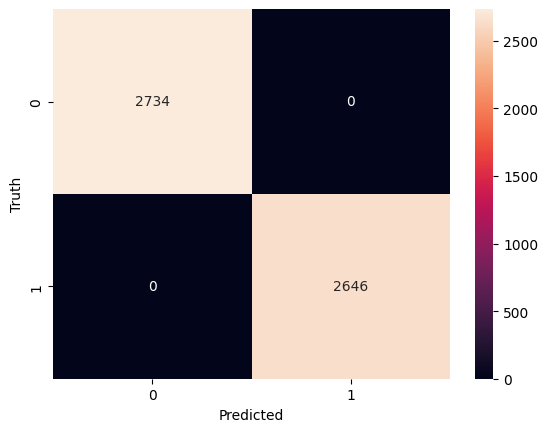

In [39]:
cm = confusion_matrix(y_test, model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


As shown in above figure here we get 100% accuracy.


### 2- Finding the hyperparameters of the models using Grid Search

In essence, GridSearchCV performs a grid search over all hyperparameter combinations provided, runs cross-validation on each combination, and returns the hyperparameters that produced the best model performance. This process can save significant time and effort in tuning hyperparameters for complex models, as it automates the process of searching through a large parameter space.


Parameters for `GridSearchCV`:

- `estimator`: The model which we want to find the hyperparameters.

- `param_grid`: The hyperparameters which we want to find.

- `cv`: Number of folds for cross-validation. (validation set)

- `scoring`: The scoring method which we want to use.

- `n_jobs`: Number of jobs to run in parallel. `-1` means using all processors.


In [44]:

# Define the hyperparameters to tune
# hyperparameters = {
#    'penalty': ['l1', 'l2'],
#    'C': [0.001, 0.01, 0.1, 1, 10, 100],
#    'solver': ['liblinear', 'saga']
# }

# # Create the logistic regression model
# logistic_model = LogisticRegression(max_iter=10000)
# #
# # Create the grid search object
# logistic_grid_search = GridSearchCV(
#    logistic_model, hyperparameters, cv=5, n_jobs=-1)

# # Fit the grid search object to the data
# logistic_grid_search.fit(X_train, y_train)

# # Print the results
# print(f'Best Accuracy: {logistic_grid_search.best_score_ * 100:5.2f}%')
# print(f'Best Parameters: {logistic_grid_search.best_params_}')
# print(
#    f'Logistic Regression Accuracy: {logistic_grid_search.score(X_test, y_test) * 100:5.2f}%')


print("Here because of low accuracy we will get stuck in iteration so we skip")


Here because of low accuracy we will get stuck in iteration so we skip


In [41]:
# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Perform a grid search over the parameter grid using 5-fold cross-validation
knn_grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)

# Fit the grid search to the training data
knn_grid_search.fit(X_train, y_train)

# Print the results
print(f'Best Accuracy: {knn_grid_search.best_score_ * 100:5.2f}%')
print(f'Best Parameters: {knn_grid_search.best_params_}')
print(f'KNN Accuracy: {knn_grid_search.score(X_test, y_test) * 100:5.2f}%')


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and

Best Accuracy: 90.91%
Best Parameters: {'n_neighbors': 9, 'weights': 'distance'}
KNN Accuracy: 91.45%


In [42]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=39)

# Define the hyperparameters grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Grid Search object to find the best hyperparameters
tree_grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)

# Train the Grid Search object on the training data
tree_grid_search.fit(X_train, y_train)

# Print the results
print(f'Best Accuracy: {tree_grid_search.best_score_ * 100:5.2f}%')
print(f'Best Parameters: {tree_grid_search.best_params_}')
print(
    f'Decision Tree Accuracy: {tree_grid_search.score(X_test, y_test) * 100:5.2f}%')


Best Accuracy: 100.00%
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 100.00%


### 3- Overfitting and Underfitting


#### Overfitting

Overfitting occurs when a model is too complex and fits the training data too closely, resulting in poor generalization to new data. Overfitting occurs when the model is trained on noisy data or when the model is too complex relative to the amount of training data available. An overfit model has low bias and high variance and tends to memorize the training data instead of learning the underlying patterns in the data.

#### Underfitting

Underfitting occurs when a model is too simple to capture the complexity of the data. This results in the model performing poorly on both the training and test data. An underfit model has high bias and low variance, and it fails to capture the underlying patterns in the data.

---

In the KNN model, overfitting can occur when k is too small, and the model becomes too complex. Similarly, underfitting can occur when k is too large, and the model becomes too simple. In the decision tree model, overfitting can occur when the tree is too deep, and the model becomes too complex, while underfitting can occur when the tree is too shallow, and the model becomes too simple. In the logistic regression model, overfitting can occur when the model is too complex, and there are too many features, while underfitting can occur when the model is too simple, and there are too few features.

To prevent overfitting and underfitting in the models, we can use techniques such as grid search to find the optimal hyperparameters, cross-validation to evaluate the model's performance, and feature selection to choose the most relevant features for the model.

The used models are not overfitting or underfitting. The reason is that the models are not too complex or too simple. This is why both the training accuracy and the test accuracy are almost the same and they are high enough. We can prevent overfitting and underfitting by using validation set and cross-validation. `GridSearchCV` uses cross-validation to prevent overfitting and underfitting.


### 4- Changing the pre-processing steps to improve the models

I have changed the percentage to 90% for better results.


## Ensemble Learning: Random Forest


- NOTE : the below process make take a time because the space for gridSearch is large and I tried to reduce some hyperparameters and depths for speeding the process up.


In [50]:
rand_forest_features = X_train.columns.to_list()

rand_forest_parameters = {
    'n_estimators': range(10, 100, 10),
    'max_depth': range(2, 10),
    'criterion': ['gini', 'entropy'],
    'random_state': [0, 1]
}

rand_forest_model = RandomForestClassifier()
rand_forest_clf = GridSearchCV(
    rand_forest_model, rand_forest_parameters, scoring='accuracy')
rand_forest_clf.fit(X_train[rand_forest_features], y_train)
rand_forest_pred = rand_forest_clf.predict(X_test[rand_forest_features])

print('accuracy: ', accuracy_score(y_test, rand_forest_pred))


accuracy:  1.0


#### 1- Effect of the hyperparameters on the model


We use the two following hyperparameters to check their effect on the model:

- `n_estimators`: The number of trees in the forest.

- `max_depth`: The maximum depth of the tree.


Text(0.5, 0, 'max_depth')

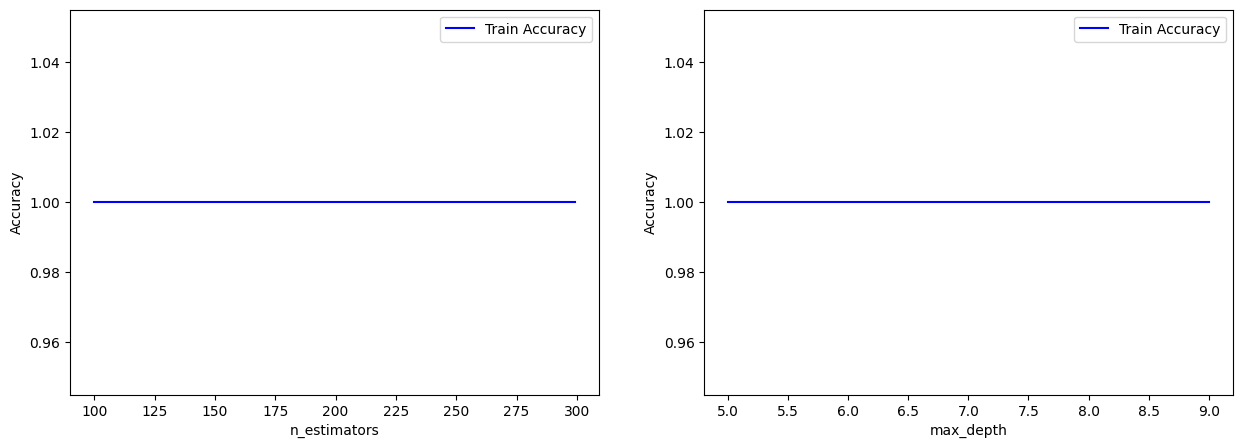

In [51]:
n_estimators = range(100, 300)
max_depth = range(5, 10)

_, ax = plt.subplots(1, 2, figsize=(15, 5))

train_results = []
for estimator in n_estimators:
    forest = RandomForestClassifier(n_estimators=estimator, random_state=0)
    forest.fit(X_train, y_train)
    train_pred = forest.predict(X_train)
    train_results.append(accuracy_score(y_train, train_pred))

ax[0].plot(n_estimators, train_results, 'b', label='Train Accuracy')
ax[0].legend()
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('n_estimators')

train_results = []
for depth in max_depth:
    forest = RandomForestClassifier(max_depth=depth, random_state=0)
    forest.fit(X_train, y_train)
    train_pred = forest.predict(X_train)
    train_results.append(accuracy_score(y_train, train_pred))

ax[1].plot(max_depth, train_results, 'b', label='Train Accuracy')
ax[1].legend()
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('max_depth')


As it is shown in the above figures, the accuracy of the model increases when the number of trees in the forest increases or when the maximum depth of the tree increases. The reason is that the model becomes more complex and it fits the training data better.


#### 2- Bias and Variance


#### Bias

Bias refers to the error that occurs when a model has overly simplistic assumptions about the data it is trying to model. A model with high bias tends to underfit the data, meaning that it fails to capture important patterns or relationships in the data. This can result in a model that is too simple and inaccurate. A high bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).

#### Variance

Variance, on the other hand, refers to the error that occurs when a model is overly sensitive to the noise or random fluctuations in the training data. A model with high variance tends to overfit the data, meaning that it fits the training data too closely and fails to generalize well to new, unseen data. This can result in a model that is too complex and inaccurate.
A high variance can cause overfitting: modeling the random noise in the training data, rather than the intended outputs.


Ideally, we want a model with low bias and low variance, meaning that it is both accurate and can generalize well to new data. If the model has high bias, it means that the model is too simple and it doesn't fit the training data well. If the model has high variance, it means that the model is too complex and it fits the training data too well. This is called the bias-variance tradeoff. The goal is to find a sweet spot where the model neither underfits nor overfits the training data. The following figure shows the bias-variance tradeoff.

![Bias and Variance](https://media.geeksforgeeks.org/wp-content/uploads/20200107023418/1_oO0KYF7Z84nePqfsJ9E0WQ.png)


## Point Score: methods based on boosting-gradient


### 1-Explain how this method works by searching various internet sources. Explain the difference between boosting tree and decision tree


Boosting-Gradient is a machine learning ensemble method that can be used for both regression and classification tasks. The method works by combining several weak models, typically decision trees, into a strong model. The combination of weak models helps to improve the accuracy of predictions and reduce overfitting. Boosting-Gradient is a type of boosting algorithm, which is a method that uses a set of weak learners to create a strong learner.

Boosting-Gradient works by iteratively training decision trees on the residuals of the previous tree. The residuals are the difference between the actual values and the predicted values of the previous tree. The new tree is trained to predict the residuals and is added to the previous tree to create a more accurate model. This process is repeated until the desired accuracy is achieved or the algorithm reaches a stopping criterion.

The difference between a boosting tree and a decision tree is that a boosting tree is an ensemble of decision trees. In other words, a boosting tree is a combination of several decision trees, whereas a decision tree is a standalone model. Boosting trees work by iteratively adding decision trees to improve the accuracy of the model, while decision trees do not involve any combination of models. Boosting trees are often used in situations where high accuracy is required, while decision trees are more commonly used in situations where interpretability is more important than accuracy.


#### 2-XGBoost is one of the latest machine learning methods based on the boosting method that was presented in 2016. Explain how this tree works by searching internet sources?


XGBoost (Extreme Gradient Boosting) is a supervised learning algorithm that is based on decision trees and gradient boosting techniques. It is a powerful tool for building predictive models and has been widely used in various fields including finance, marketing, and healthcare.

XGBoost works by building an ensemble of decision trees in a sequential manner. Each decision tree is trained to correct the mistakes of the previous trees. This process is called boosting, and it is an iterative process that continues until a predefined stopping condition is met.

At each iteration, XGBoost computes the gradient of the loss function with respect to the current predictions of the ensemble. The gradient is used to train a new decision tree that is added to the ensemble. The new tree is trained to predict the gradient of the loss function, which means that it is trained to correct the mistakes of the previous trees.

XGBoost uses a variety of techniques to prevent overfitting and improve the performance of the model. One such technique is called regularization, which adds a penalty term to the loss function to discourage the model from learning too complex patterns. Another technique is called early stopping, which stops the boosting process when the performance of the model on a validation set stops improving.

Compared to traditional decision trees, XGBoost has several advantages. It can handle missing values, categorical variables, and non-linear relationships between variables. It is also scalable and can handle large datasets. In addition, XGBoost has been shown to be highly accurate and has won several machine learning competitions.
